In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [26]:
df = pd.read_excel (r'C:\Users\user\OneDrive\Desktop\Forage KPMG\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name= None)

#Dont show warnings

warnings.filterwarnings('ignore')

In [27]:
Transactions = df['Transactions']

Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [28]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

* Drop all Null Values 

In [29]:
#dropping all the null values

Transactions.dropna(inplace=True)

In [30]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [31]:
# Droppin product first sold date column 

Transactions.drop('product_first_sold_date',axis=1,inplace=True)

In [32]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    19445 non-null  int64         
 1   product_id        19445 non-null  int64         
 2   customer_id       19445 non-null  int64         
 3   transaction_date  19445 non-null  datetime64[ns]
 4   online_order      19445 non-null  float64       
 5   order_status      19445 non-null  object        
 6   brand             19445 non-null  object        
 7   product_line      19445 non-null  object        
 8   product_class     19445 non-null  object        
 9   product_size      19445 non-null  object        
 10  list_price        19445 non-null  float64       
 11  standard_cost     19445 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 1.9+ MB


In [33]:
# split the date column into year and month

# Transactions['transaction_date'] = pd.to_datetime(Transactions['transaction_date'])

Transactions['year'] = Transactions['transaction_date'].dt.year

In [34]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,year
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2017
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2017
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,2017
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,2017
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2017


In [35]:
num_transactions = len(Transactions['transaction_id'].unique())

print(f"There are {num_transactions} transactions for the store for the year 2017.")

There are 19445 transactions for the store for the year 2017.


* Total Number of Customers for the Year 

In [36]:
# Total number of customers

Transactions['customer_id'].nunique()

3492

In [37]:
# Total number of products

Transactions['product_id'].nunique()

101

In [38]:
# Profit per Transaction 
Transactions['profits'] = Transactions['list_price'] - Transactions['standard_cost']

In [39]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,year,profits
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2017,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2017,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,2017,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,2017,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2017,1055.82


In [40]:
online_count = Transactions['online_order'].value_counts()[1]
in_store_count = Transactions['online_order'].value_counts()[0]

print(f"There were {online_count} online transactions and {in_store_count} in-store transactions.")


There were 9739 online transactions and 9706 in-store transactions.


In [41]:
# Profit per brand

Transactions.groupby('brand')['profits'].sum().sort_values(ascending=False)

brand
WeareA2B          2.717686e+06
Solex             2.355830e+06
Trek Bicycles     1.807321e+06
Giant Bicycles    1.541165e+06
OHM Cycles        1.453562e+06
Norco Bicycles    8.532516e+05
Name: profits, dtype: float64

In [42]:
## NewCustomerList

NewCustomerList = df['NewCustomerList']

NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [53]:
NewCustomerList.dropna(inplace=True)

In [54]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           715 non-null    object        
 1   last_name                            715 non-null    object        
 2   gender                               715 non-null    object        
 3   past_3_years_bike_related_purchases  715 non-null    int64         
 4   DOB                                  715 non-null    datetime64[ns]
 5   job_title                            715 non-null    object        
 6   job_industry_category                715 non-null    object        
 7   wealth_segment                       715 non-null    object        
 8   deceased_indicator                   715 non-null    object        
 9   owns_car                             715 non-null    object        
 10  tenure        

<AxesSubplot: xlabel='wealth_segment', ylabel='past_3_years_bike_related_purchases'>

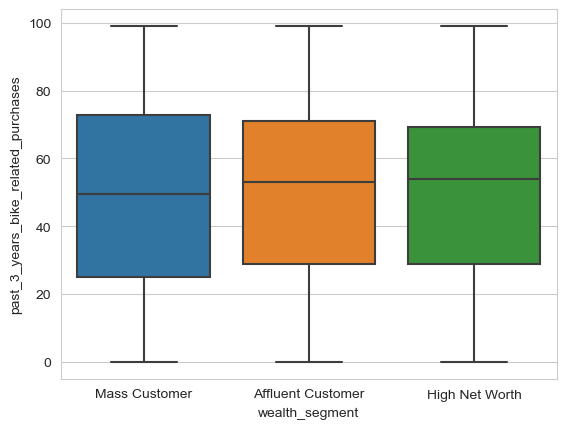

In [55]:
#How does the distribution of 'past_3_years_bike_related_purchases' vary across different 'wealth_segment' groups?

sns.boxplot(x='wealth_segment',y='past_3_years_bike_related_purchases',data=NewCustomerList)

<AxesSubplot: xlabel='owns_car', ylabel='past_3_years_bike_related_purchases'>

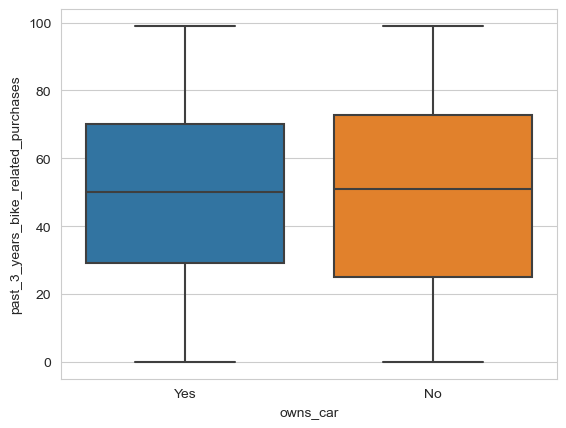

In [62]:
#How does the distribution of 'past_3_years_bike_related_purchases' differ between customers who own a car and those who don't?

sns.boxplot(x='owns_car',y='past_3_years_bike_related_purchases',data=NewCustomerList)

<AxesSubplot: xlabel='past_3_years_bike_related_purchases', ylabel='Count'>

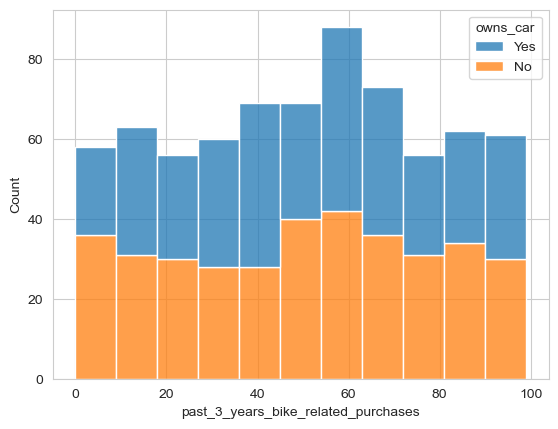

In [64]:
sns.histplot(x='past_3_years_bike_related_purchases', hue='owns_car', data=NewCustomerList, multiple='stack')

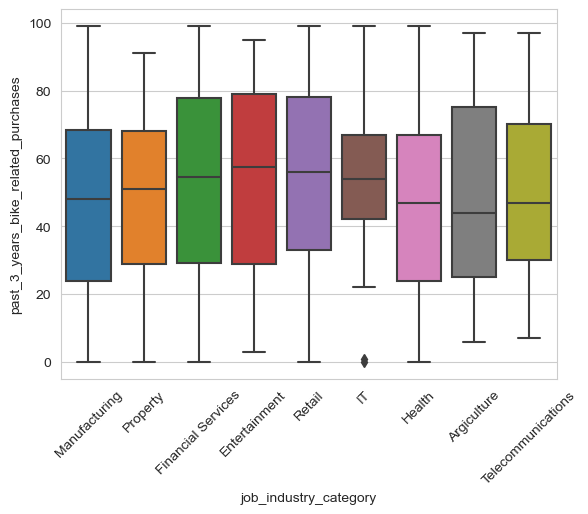

In [69]:
#How does the distribution of 'past_3_years_bike_related_purchases' vary across different 'job_industry_category' groups?

sns.boxplot(x='job_industry_category',y='past_3_years_bike_related_purchases',data=NewCustomerList)

xticks = plt.xticks(rotation=45)

### Profit per Brand and Product Line Plot 

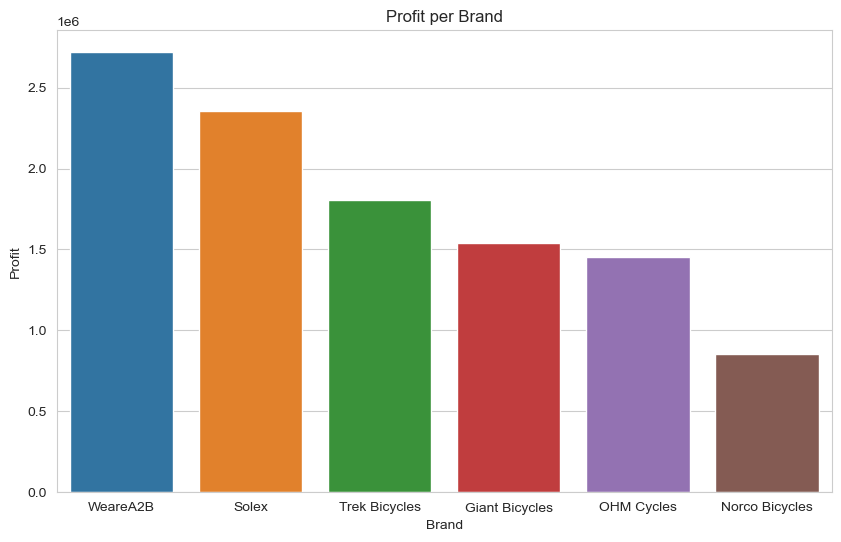

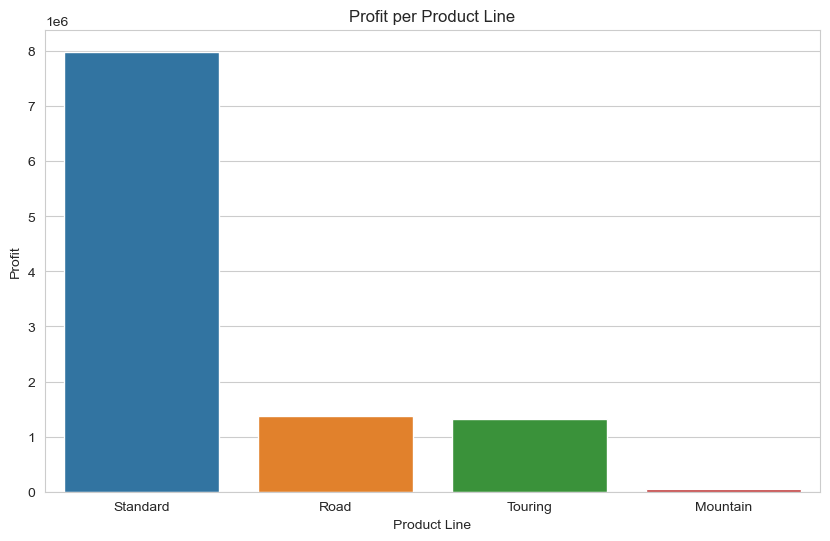

In [44]:
# plot of profit per brand seaborn

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.barplot(x=Transactions.groupby('brand')['profits'].sum().sort_values(ascending=False).index,
            y=Transactions.groupby('brand')['profits'].sum().sort_values(ascending=False).values)
plt.title('Profit per Brand')   
plt.xlabel('Brand')
plt.ylabel('Profit')
plt.show()

# Profit per product line

Transactions.groupby('product_line')['profits'].sum().sort_values(ascending=False)

# plot of profit per product line seaborn

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.barplot(x=Transactions.groupby('product_line')['profits'].sum().sort_values(ascending=False).index,
            y=Transactions.groupby('product_line')['profits'].sum().sort_values(ascending=False).values)
plt.title('Profit per Product Line')
plt.xlabel('Product Line')
plt.ylabel('Profit')
plt.show()